Calvin Passmore

ECE 5660

# Final Exam

## Problem 1

In [5]:
f0 = 0.85
f1 = -0.1
f2 = 0.4
vk = -0.12
Mpp = 14.2
Mnp = 13.2
Mpn = 12.2
Mnn = 16.1

# Ik, Ik-1, Ik-2
Is = []
for k2 in [-1, 1]:
    for k1 in [-1, 1]:
        for k in [-1, 1]:
            Is.append([k2, k1, k])

for k, k1, k2 in Is:
    mu = (vk - (f0*k + f1*k1 + f2*k2))**2
    print(f'Ik-2 = {k2:2} Ik-1 = {k1:2} Ik = {k:2} mu = {mu}')

Ik-2 = -1 Ik-1 = -1 Ik = -1 mu = 1.0608999999999995
Ik-2 =  1 Ik-1 = -1 Ik = -1 mu = 0.05289999999999999
Ik-2 = -1 Ik-1 =  1 Ik = -1 mu = 1.5129
Ik-2 =  1 Ik-1 =  1 Ik = -1 mu = 0.18489999999999995
Ik-2 = -1 Ik-1 = -1 Ik =  1 mu = 0.4488999999999999
Ik-2 =  1 Ik-1 = -1 Ik =  1 mu = 2.1609000000000007
Ik-2 = -1 Ik-1 =  1 Ik =  1 mu = 0.22089999999999999
Ik-2 =  1 Ik-1 =  1 Ik =  1 mu = 1.6129


<p style="page-break-after:always;"></p>

## Problem 2

In [12]:
from numpy import log2, log10

d = 0.057
M = 8
Es = 2/3*(M - 1)*(d**2)
Eb = Es/log2(M)

EsdB = 10*log10(Es)
EbdB = 10*log10(Eb)

print(Es)
print(Eb)

print(EsdB)
print(EbdB)

0.015161999999999998
0.0050539999999999995
-18.19243507696442
-22.96364762416104


In [16]:
from math import sqrt, erfc
d = 0.057
N0 = 0.0035 * 2
sigma = sqrt(N0/2)

print(sigma)

prob_error = 0.5 * ( erfc(d/(2*sigma))*erfc(d/sigma) - 2*erfc(d/(2*sigma)) - 3*erfc(d/sigma) )

print(prob_error)

0.05916079783099616
-0.7123429293028258


<p style="page-break-after:always;"></p>

## Problem 4

| Count |  State  | Output |
|-------|---------|--------|
|   0   | 1 0 0 0 |   0    |
|   1   | 0 1 0 0 |   0    |
|   2   | 0 0 1 0 |   0    |
|   3   | 0 0 0 1 |   0    |
|   4   | 0 0 0 0 |   1    |
|   5   | 1 0 1 0 |   0    |
|   6   | 0 1 0 1 |   0    |
|   7   | 0 0 1 0 |   1    |
|   8   | 1 0 1 1 |   0    |
|   9   | 0 1 0 1 |   1    |
|  10   | 1 0 0 0 |   1    |
|  11   | 1 1 1 0 |   0    |
|  12   | 0 1 1 1 |   0    |
|  13   | 0 0 1 1 |   1    |
|  14   | 1 0 1 1 |   1    |
|  15   | 1 1 1 1 |   1    |
|  16   | 1 1 0 1 |   1    |
|  17   | 1 1 0 0 |   1    |
|  18   | 1 1 0 0 |   0    |
|  19   | 0 1 1 0 |   0    |
|  20   | 0 0 1 1 |   0    |
|  21   | 0 0 0 1 |   1    |
|  22   | 1 0 1 0 |   1    |
|  23   | 1 1 1 1 |   0    |
|  24   | 0 1 1 1 |   1    |
|  25   | 1 0 0 1 |   1    |
|  26   | 1 1 1 0 |   1    |
|  27   | 1 1 0 1 |   0    |
|  28   | 0 1 1 0 |   1    |
|  29   | 1 0 0 1 |   0    |
|  30   | 0 1 0 0 |   1    |
|  31   | 1 0 0 0 |   0    |
|  32   | 0 1 

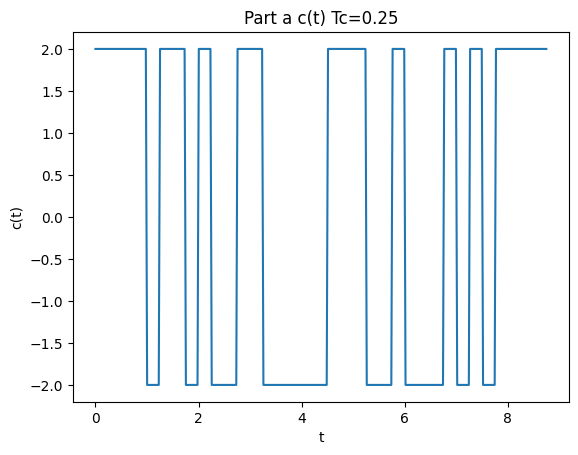

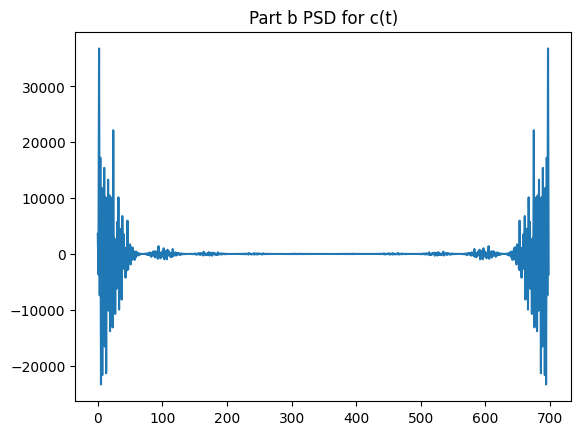

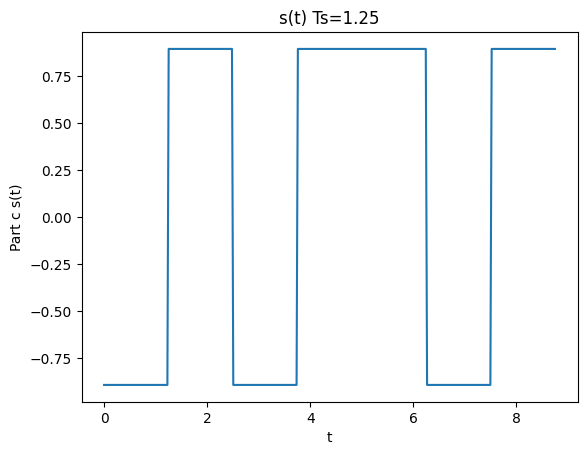

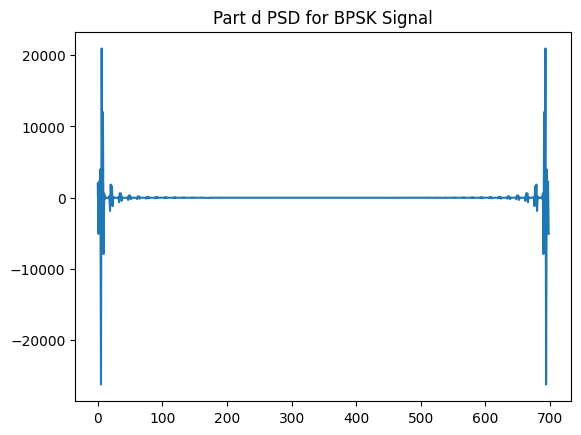

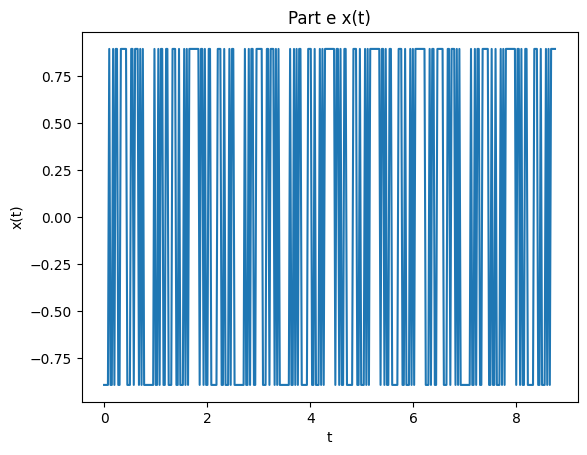

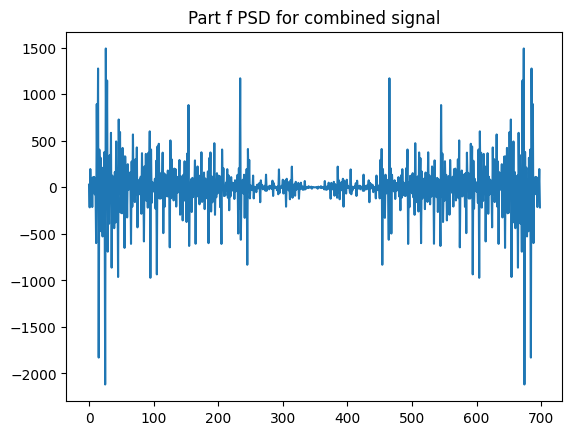

In [24]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

class LFSR:
    def __init__(self, regs=[1,0,0,0], xor = [1,0,0,0], count=16) -> None:
        self.regs = regs
        self.xor = xor
        self.output = self.regs[-1]
        self.count = count
        self.outputs = [self.output]
        self.c = []

    def run(self):
        self.print_header()
        for i in range(self.count):
            self.print_state(i)
            for index in reversed(range(len(self.regs))):
                if index == 0:
                    self.regs[0] = self.output
                else:
                    if self.xor[index - 1]:
                        self.regs[index] = self.regs[index - 1] ^ self.output
                    else:
                        self.regs[index] = self.regs[index - 1]
            self.output = self.regs[-1]
            self.outputs.append(self.output)
        self.outputs.pop(-1)

    def print_header(self):
        print("| Count |  State  | Output |")
        print("|-------|---------|--------|")

    def print_state(self, count):
        print(f"| {count:^5} | {self.regs[0]} {self.regs[1]} {self.regs[2]} {self.regs[3]} | {self.output:^6} |")

def power_sepctral_density(signal, file_name:str, format='png'):
    psd = np.fft.fft(np.correlate(signal, signal, 'full'))
    length = len(psd)
    
    plt.figure()
    plt.title(file_name)
    plt.plot(psd)
    plt.show()

if __name__ == '__main__':
    lfsr = LFSR(regs=[1,0,0,0,0], xor=[0,1,0,0,0], count=35)
    lfsr.run()
    ct = [(-1)**b for b in lfsr.outputs]

    Tc = 0.25
    num_points_in_pulse = 10

    signal = []
    for m in ct:
        for num in range(num_points_in_pulse):
            signal.append(1/sqrt(Tc) * m)

    spacing = np.linspace(0, Tc * len(ct), num_points_in_pulse * len(ct))
    
    plt.figure()
    plt.plot(spacing, signal)
    plt.title(f"Part a c(t) Tc={Tc}")
    plt.xlabel("t")
    plt.ylabel('c(t)')
    plt.show()
    # plt.savefig('images/c_t_lfsr.png', format='png')

    power_sepctral_density(signal, "Part b PSD for c(t)")

    Ts = 5*Tc
    bits = [0, 1, 0, 1, 1, 0, 1]
    bits_sym = [-1 if b == 0 else 1 for b in bits]
    bpsk_signal = []
    for b in bits_sym:
        for num in range(5 * num_points_in_pulse):
            bpsk_signal.append(b / sqrt(Ts))

    bpsk_spacing = np.linspace(0, Ts * len(bits_sym), num_points_in_pulse * 5 * len(bits_sym))
    plt.figure()
    plt.plot(bpsk_spacing, bpsk_signal)
    plt.title(f's(t) Ts={Ts}')
    plt.xlabel("t")
    plt.ylabel('Part c s(t)')
    plt.show()
    # plt.savefig('images/s_t_lfsr.png', format='png')

    power_sepctral_density(bpsk_signal, "Part d PSD for BPSK Signal")

    xt = [ct[idx % len(ct)] * bpsk_signal[idx] for idx in range(len(bpsk_signal))]
    plt.figure()
    plt.plot(bpsk_spacing, xt)
    plt.title("Part e x(t)")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.show()
    # plt.savefig('images/x_t_lfsr.png', format='png')

    power_sepctral_density(xt, "Part f PSD for combined signal")



<p style="page-break-after:always;"></p>

## Problem 5

In [44]:
import numpy as np
H = np.array([
    [1, 1, 0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0, 0, 1]
])
print(H)

r = np.array([[0, 0, 0, 1, 0, 1, 0]])

s = r * H
print(s)

[[1 1 0 1 1 0 0]
 [1 0 1 1 0 1 0]
 [0 1 1 1 0 0 1]]
[[0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0]]


In [43]:
import numpy as np
import copy

G = np.array([
    [1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 1, 1, 1, 1]
])

r = np.array([0, 0, 0, 1, 0, 1, 0])

ms = []
for num in range(2**4):
    ms.append([int(i) for i in f'{num:04b}'])

# for c in cs:
for m in ms:
    c = np.matmul(m, G) % 2
    # print(f'c = {c}')
    for idx in range(len(c)):
        r_hat = copy.deepcopy(c)
        r_hat[idx] ^= 1
        # print(f'c_tx = {r_hat}')
        if np.array_equal(r_hat, r):
            print(f'm = {m} c = {c} r_hat = {r_hat}')


m = [0, 1, 0, 1] c = [0 1 0 1 0 1 0] r_hat = [0 0 0 1 0 1 0]
